# What happens to the placement of prime numbers in unfounded expressions?

## No.3 三次元空間にプロットしてみる その2


## 関数諸々  

このファイル内で共通で使う関数です。  
最初にこのセルを実行しておいて下さい

In [1]:
import numpy as np

def choice_prime_num(arr):
    """Extract prime numbers"""
    if isinstance(arr, np.ndarray):
        arr = arr.tolist()
    if 0 in arr:
        arr.remove(0)
    if 1 in arr:
        arr.remove(1)
    prime = []
    _min = min(arr)
    _max = max(arr)
    while _min <= np.sqrt(_max):
        _min = min(arr)
        prime.append(_min)
        for i in arr:
            if i != _min and i % _min == 0:
                arr.remove(i)
        arr.remove(_min)
    prime.extend(arr)

    return prime

def divied_colors(int_range, prime_num):
    colors = []
    for num in range(len(int_range)):
        if num in prime_num:
            colors.append('red')
        elif num % 2 == 0:
            colors.append('darkslateblue')
        else:
            colors.append('mediumseagreen')
    return colors


def make_plot_arr(arr1, arr2, theta):
    radius = np.sqrt(arr1[0]**2 + arr1[1]**2)
    arr = np.array([radius, arr2[0], arr2[1]])
    matrix = np.array([
        [np.cos(theta), np.sin(theta), 0],
        [-np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

    res =  matrix.dot(arr)
    return res


## 複素数を回転に使う  

そもそも、こっちの使い方のほうが、先のファイルでの使い方より**本筋**かと思われます（苦笑）  

試しに0以上、6,000未満の正の整数内の素数を $x$の値  
$comp = 1- i^{e n}$ で出てきた複素数の  
実部を $y$の値  
虚部を $z$の値  
としてプロットしてみます。  

勿論、今回も式は**ただの思い付きであって、何ら意味はありません**

<IPython.core.display.Javascript object>


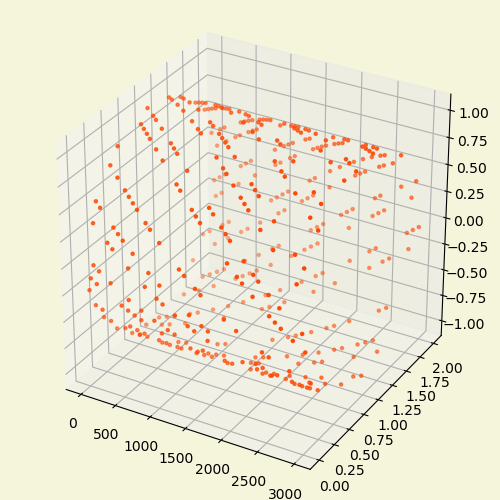

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d_02(prime_num):
    comp_num = 1 - 1j ** (np.e * prime_num)

    y = comp_num.real
    z = comp_num.imag

    fig = plt.figure(figsize=(5, 5))
    ax = Axes3D(fig)
    ax.set_facecolor('beige')
    ax.scatter(prime_num, y, z, s=5, c="orangered")


int_range = np.arange(0, 3000)
prime_num = np.array(choice_prime_num(int_range))

plot3d_02(prime_num)

出力結果は、だいたい想像通りです（笑）  

ところで、複素数生成用に使っている $1- i^{e  \theta }$ を $1+ e^{i  \theta }$ と比較すると以下のようになります

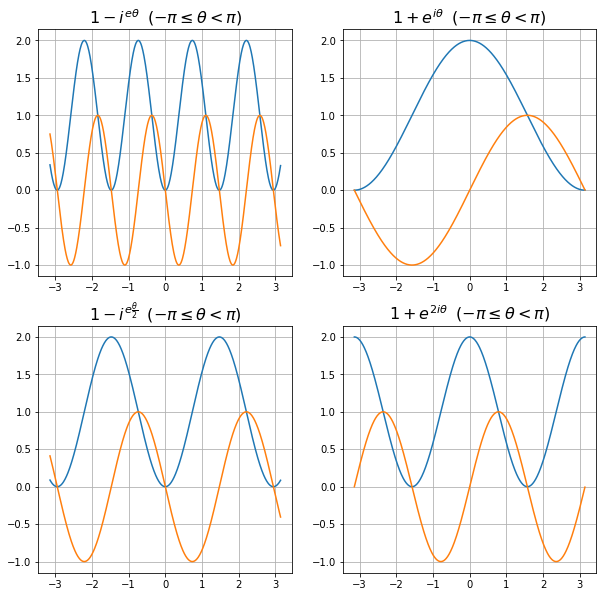

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

theta = np.arange(-np.pi, np.pi, 0.01)

expr1 = (1 - 1j ** (np.e * theta))
expr2 = (1 + np.exp(1j * theta))
expr3 = (1 - 1j ** (np.e * (theta/ 2)))
expr4 = (1 + np.exp(1j * theta* 2))


plt.figure(figsize=(10,10))
ax1_r = expr1.real
ax1_i = expr1.imag
ax2_r = expr2.real
ax2_i = expr2.imag
ax3_r = expr3.real
ax3_i = expr3.imag
ax4_r = expr4.real
ax4_i = expr4.imag

ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

ax1.plot(theta, ax1_r)
ax1.plot(theta, ax1_i)
ax1.set_title(r'$1 - i^{e \theta}  \;\; (- \pi \leq \theta < \pi)$', fontsize=16)
ax1.grid()

ax2.plot(theta, ax2_r)
ax2.plot(theta, ax2_i)
ax2.set_title(r'$1 + e^{i \theta}  \;\; (- \pi \leq \theta < \pi)$', fontsize=16)
ax2.grid()

ax3.plot(theta, ax3_r)
ax3.plot(theta, ax3_i)
ax3.set_title(r'$1 - i^{e \frac{\theta}{2}}  \;\; (- \pi \leq \theta < \pi)$', fontsize=16)
ax3.grid()

ax4.plot(theta, ax4_r)
ax4.plot(theta, ax4_i)
ax4.set_title(r'$1 + e^{2 i  \theta }  \;\; (- \pi \leq \theta < \pi)$', fontsize=16)
ax4.grid()


## ここからが本番

以後、渦巻きと回転を無理矢理組み合わせて遊んでみます。  
尚、そもそも**ウラムの螺旋**を発展させてみるというのが、一応のコンセプトなので、**渦巻き**を使用することには、とことんこだわります（笑）

やろうとしていることは以下の"手書き"の図の通り（・・・って、これで解ってもらえるかな？）

これまで同様の渦巻状に配置された、 $xy$平面上の点、$(n \cos{\theta}, n \sin{\theta})$を、中心点から各点へのベクトルに直交する複素平面上でさらに$\cos{\theta} + i \sin{\theta}$ の位置まで動かしてプロットしていきます。

![image](./img/pict_no1.jpg)  



これらの操作も勿論、ただの**思い付き**です。  
が、まぁ元々「素数の並び方が面白い形にならないか？」を、**数学的な意味は考えず**試行錯誤してみて楽しんでいるだけなので、細かいこと(?)は気にせず、面白い結果が出てくることだけを期待して先に進みます。  

$\theta$ は $\frac{e \pi}{2} n$を使います。

In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def plot3d_03(int_range, prime_num, rad):
    # "divied_colors()"はページ最初のセル内にある関数
    colors = divied_colors(int_range, prime_num)
    theta = rad * int_range

    ax1_x = np.cos(theta) * int_range
    ax1_y = np.sin(theta) * int_range
    ax1 = np.stack([ax1_x, ax1_y]).T
    
    comp_num = (np.cos(theta) + 1j * np.sin(theta))
    ax2 = np.stack([comp_num.real, comp_num.imag]).T

    plots = []
    for arr1, arr2, t in zip(ax1, ax2, theta):
        # "make_plot_arr()"はページ最初のセル内にある関数
        plots.append(make_plot_arr(arr1, arr2, t))

    cood = np.array(plots).T

    fig = plt.figure(figsize=(5, 5))
    ax = Axes3D(fig)
    ax.set_facecolor('aliceblue')
    ax.scatter(cood[0], cood[1], cood[2], s=3, c=colors, alpha=0.5)


<IPython.core.display.Javascript object>


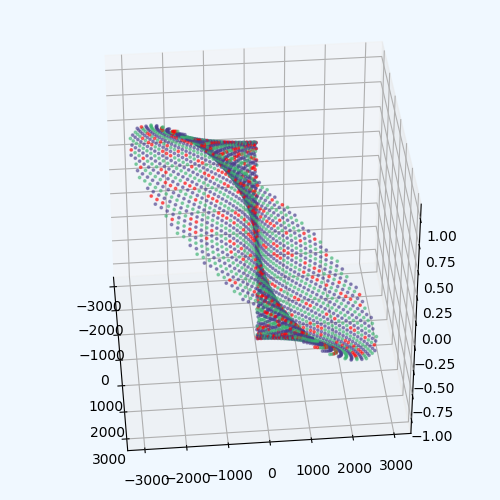

In [5]:
%matplotlib notebook

INT_RANGE = np.arange(1, 3000)
PRIME_NUM = np.array(choice_prime_num(INT_RANGE))

rad = (np.e / 2) * np.pi

plot3d_03(INT_RANGE, PRIME_NUM, rad)

･･･どこかで見たような？

結論を先に言ってしまうと、$rad$の値を替えても、外形と言いますかベースとなる**型**は同じになります。  

$\theta = \frac{e^{2 \pi}}{2 \pi^{e}}$ として表示させてみると

<IPython.core.display.Javascript object>


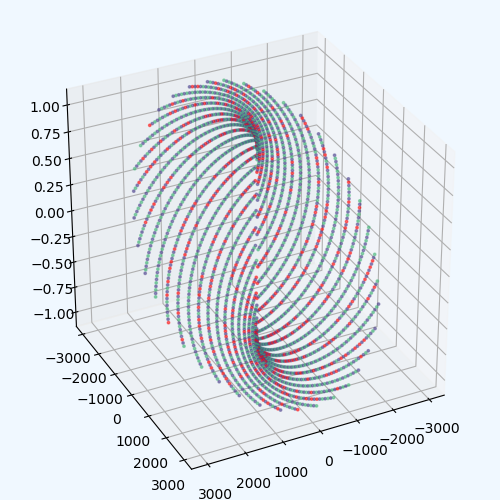

In [6]:
rad = np.e**(2 * np.pi) / (2 * np.pi**np.e)

plot3d_03(INT_RANGE, PRIME_NUM, rad)

基本となっている渦巻きはそのままなので、同じ**型**の中で各数値の並び方が変化します。  

次は $\theta = 2 e^{\pi}$  
これなんかは、案外面白いですね。  

興味あれば他の$rad$も試してみて下さい。

<IPython.core.display.Javascript object>


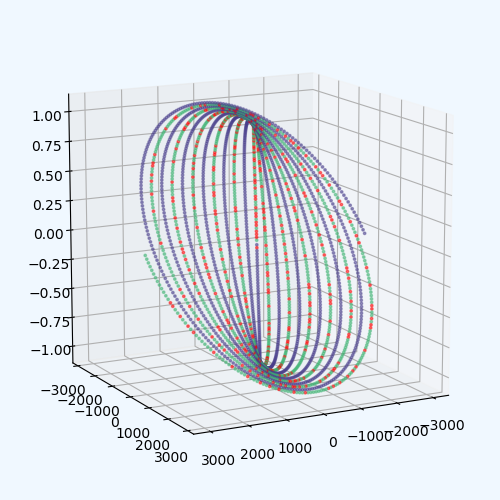

In [7]:
#rad = np.exp(np.pi / 2)
# rad = np.exp(-np.pi)
# rad = np.e
# rad = np.e / (2 * np.pi)
# rad = np.e**(2 * np.pi) / (2 * np.pi**np.e)
# rad = np.e**(np.pi) / (np.pi**np.e)
# rad = (np.pi**np.e) / (np.e**(-np.pi))
# rad = (2 * np.pi**np.e) / (np.e**(-2 * np.pi)) 
# rad = (2 * np.pi) / np.e**2
# rad = 2 / (np.e*np.pi)
# rad = np.pi**np.e
# rad = 2**np.e*np.pi
rad = (2*np.e)**np.pi


plot3d_03(INT_RANGE, PRIME_NUM, rad)

次のファイルでは、複素数の生成式を替えてみます。